In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
pd.set_option('display.max_columns', 65)

In [3]:
CADD13_mechanisms_scores=pd.read_csv("../Input_for_Models/CADD13_mechanisms_scores.csv")
CADD13_mechanisms_scores=CADD13_mechanisms_scores.rename({"Unnamed: 0":"Sample"},axis=1)
CADD13_mechanisms_scores=CADD13_mechanisms_scores.set_index("Sample")
CADD13_mechanisms_scores

,MAPK subgraph,Calcium-dependent signal transduction,GRB10 subgraph,Synuclein subgraph,Notch signaling subgraph,Calsyntenin subgraph,Ubiquitin subgraph,Chaperone subgraph,PINK1 subgraph,Caspase subgraph,Reactive oxygen species subgraph,miRNA subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Pre-translational events,Regulation of cytoskeleton subgraph,Akt/mTOR subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Tumor necrosis factor subgraph,Response to oxidative stress,Nitric oxide subgraph,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Transport related subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,GABA subgraph,Innate immune system subgraph,Folate metabolic subgraph,Lipid metabolism subgraph,G-protein-mediated signaling,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,Interferon signaling subgraph,Nuclear factor Kappa beta subgraph,Insulin signal transduction,Mitochondria fission subgraph,DNA synthesis,Post-translational events,FMR1 subgraph,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,RhoA subgraph,Bcl-2 subgraph,Mitochondria fusion subgraph,Unfolded protein response subgraph,Vascular endothelial growth factor subgraph,Amyloidogenic subgraph,Toll like receptor subgraph,Estrogen subgraph,Cyclic AMP subgraph
Sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,0.000009,0.000028,0,0.002736,0.001473,0,0.000096,0.001167,0,0.001273,0.001187,0,0.001249,0.000009,0.001176,0.002631,0,0.002640,0,0.001463,0.002631,0.000009,0.001463,0.001463,0.002631,0.001167,0.002631,0,0,0,0.000019,0.001176,0.003105,0,0.000943,0.001167,0.001167,0.000038,0,0.001463,0,0.001176,0,0.001463,0.000203,0.0,0,0,0,0,0.001167,0,0,0.000009,0.000072,0,0.001167,0,0.002631,0,0,0,0,0
AET0380,0.000009,0.000028,0,0.001414,0.000009,0,0.000048,0.001356,0,0.001414,0.001376,0,0.001510,0.000009,0.001365,0.001356,0,0.001365,0,0.000000,0.001356,0.000009,0.000000,0.000000,0.001356,0.001356,0.001356,0,0,0,0.000019,0.001365,0.002286,0,0.001521,0.001356,0.001356,0.000000,0,0.000000,0,0.001365,0,0.000000,0.000165,0.0,0,0,0,0,0.001356,0,0,0.000009,0.000145,0,0.001356,0,0.001356,0,0,0,0,0
AET0027,0.000060,0.000062,0,0.001408,0.000060,0,0.000096,0.000980,0,0.001136,0.000982,0,0.001112,0.000060,0.001040,0.000980,0,0.001040,0,0.000000,0.000980,0.000060,0.000000,0.000000,0.000980,0.000980,0.000980,0,0,0,0.000002,0.001040,0.001709,0,0.001521,0.000980,0.000980,0.000000,0,0.000000,0,0.001040,0,0.000000,0.000165,0.0,0,0,0,0,0.000980,0,0,0.000060,0.000072,0,0.000980,0,0.000980,0,0,0,0,0
AET0049,0.000009,0.000041,0,0.001481,0.000009,0,0.000096,0.001375,0,0.001481,0.001407,0,0.001529,0.000009,0.001384,0.001375,0,0.001384,0,0.000000,0.001375,0.000009,0.000000,0.000000,0.001375,0.001375,0.001375,0,0,0,0.000032,0.001384,0.001782,0,0.000947,0.001375,0.001375,0.000298,0,0.000000,0,0.001384,0,0.000000,0.000338,0.0,0,0,0,0,0.001375,0,0,0.000009,0.000145,0,0.001375,0,0.001375,0,0,0,0,0
AET0006,0.000060,0.000079,0,0.003162,0.001524,0,0.000000,0.001638,0,0.001698,0.001657,0,0.001698,0.000060,0.001698,0.003102,0,0.003162,0,0.001463,0.003102,0.000060,0.001463,0.001463,0.003102,0.001638,0.003102,0,0,0,0.000019,0.001698,0.003627,0,0.001521,0.001638,0.001638,0.000000,0,0.001463,0,0.001698,0,0.001463,0.000165,0.0,0,0,0,0,0.001638,0,0,0.000060,0.000000,0,0.001638,0,0.003102,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.000060,0.000060,0,0.000651,0.000060,0,0.000096,0.000494,0,0.000651,0.000494,0,0.000554,0.000060,0.000554,0.000494,0,0.000554,0,

#### CADD13 Feature selection and cleaning

In [4]:
CADD13_mechanisms_scores.describe()

,MAPK subgraph,Calcium-dependent signal transduction,GRB10 subgraph,Synuclein subgraph,Notch signaling subgraph,Calsyntenin subgraph,Ubiquitin subgraph,Chaperone subgraph,PINK1 subgraph,Caspase subgraph,Reactive oxygen species subgraph,miRNA subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Pre-translational events,Regulation of cytoskeleton subgraph,Akt/mTOR subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Tumor necrosis factor subgraph,Response to oxidative stress,Nitric oxide subgraph,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Transport related subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,GABA subgraph,Innate immune system subgraph,Folate metabolic subgraph,Lipid metabolism subgraph,G-protein-mediated signaling,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,Interferon signaling subgraph,Nuclear factor Kappa beta subgraph,Insulin signal transduction,Mitochondria fission subgraph,DNA synthesis,Post-translational events,FMR1 subgraph,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,RhoA subgraph,Bcl-2 subgraph,Mitochondria fusion subgraph,Unfolded protein response subgraph,Vascular endothelial growth factor subgraph,Amyloidogenic subgraph,Toll like receptor subgraph,Estrogen subgraph,Cyclic AMP subgraph
count,106.000000,106.000000,106.0,106.000000,106.000000,106.0,106.000000,106.000000,106.0,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.0,106.0,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.0,106.000000,106.0,106.000000,106.000000,1.060000e+02,106.0,106.0,106.0,106.0,106.000000,106.0,106.0,106.000000,106.000000,106.0,106.000000,106.0,106.000000,106.0,106.0,106.0,106.0,106.0
mean,0.000028,0.000050,0.0,0.001815,0.000607,0.0,0.000060,0.001110,0.0,0.001198,0.001133,0.0,0.001234,0.000028,0.001138,0.001690,0.0,0.001717,0.0,0.000579,0.001690,0.000028,0.000579,0.000579,0.001690,0.001110,0.001690,0.0,0.0,0.0,0.000022,0.001138,0.002136,0.0,0.001241,0.001110,0.001110,0.000066,0.0,0.000579,0.0,0.001138,0.0,0.000579,0.000166,8.080137e-07,0.0,0.0,0.0,0.0,0.001110,0.0,0.0,0.000028,0.000096,0.0,0.001110,0.0,0.001690,0.0,0.0,0.0,0.0,0.0
std,0.000038,0.000040,0.0,0.000947,0.000854,0.0,0.000033,0.000305,0.0,0.000306,0.000305,0.0,0.000310,0.000038,0.000307,0.000931,0.0,0.000937,0.0,0.000848,0.000931,0.000038,0.000848,0.000848,0.000931,0.000305,0.000931,0.0,0.0,0.0,0.000013,0.000307,0.001012,0.0,0.000386,0.000305,0.000305,0.000123,0.0,0.000848,0.0,0.000307,0.0,0.000848,0.000139,5.854350e-06,0.0,0.0,0.0,0.0,0.000305,0.0,0.0,0.000038,0.000050,0.0,0.000305,0.0,0.000931,0.0,0.0,0.0,0.0,0.0
min,0.000005,0.000009,0.0,0.000472,0.000009,0.0,0.000000,0.000363,0.0,0.000472,0.000366,0.0,0.000554,0.000005,0.000424,0.000363,0.0,0.000424,0.0,0.000000,0.000363,0.000005,0.000000,0.000000,0.000363,0.000363,0.000363,0.0,0.0,0.0,0.000000,0.000424,0.000424,0.0,0.000077,0.000363,0.000363,0.000000,0.0,0.000000,0.0,0.000424,0.0,0.000000,0.000040,0.000000e+00,0.0,0.0,0.0,0.0,0.000363,0.0,0.0,0.000005,0.000000,0.0,0.000363,0.0,0.000363,0.0,0.0,0.0,0.0,0.0
25%,0.000009,0.000028,0.0,0.001128,0.000009,0.0,0.000048,0.000874,0.0,0.000975,0.000909,0.0,0.000992,0.000009,0.000890,0.001004,0.0,0.001069,0.0,0.000000,0.001004,0.000009,0.000000,0.000000,0.001004,0.000874,0.001004,0.0,0.0,0.0,0.000017,0.000890,0.001367,0.0,0.000943,0.000874,0.000874,0.000000,0.0,0.000000,0.0,0.000890,0.0,0.000000,0.000040,0.000000e+00,0.0,0.0,0.0,0.0,0.000874,0.0,0.0,0.000009,0.000072,0.0,0.000874,0.0,0.001004,0.0,0.0,0.0,0.0,0.0
50%,0.000009,0.000040,0.0,0.001422,0.000020,0.0,0.0000

In [5]:
CADD13_mechanisms_scores.describe().to_csv("../../Documents/CADD13_describe.csv")

In [14]:
CADD13_mechanisms_scores.loc[:, (CADD13_mechanisms_scores != 0).any(axis=0)] # 26 mechanisms with only-zeros

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Regulation of cytoskeleton subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
Sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,0.000009,0.000028,0.002736,0.001473,0.000096,0.001167,0.001273,0.001187,0.001249,0.000009,0.001176,0.002631,0.002640,0.001463,0.002631,0.000009,0.001463,0.001463,0.002631,0.001167,0.002631,0.000019,0.001176,0.003105,0.000943,0.001167,0.001167,0.000038,0.001463,0.001176,0.001463,0.000203,0.0,0.001167,0.000009,0.000072,0.001167,0.002631
AET0380,0.000009,0.000028,0.001414,0.000009,0.000048,0.001356,0.001414,0.001376,0.001510,0.000009,0.001365,0.001356,0.001365,0.000000,0.001356,0.000009,0.000000,0.000000,0.001356,0.001356,0.001356,0.000019,0.001365,0.002286,0.001521,0.001356,0.001356,0.000000,0.000000,0.001365,0.000000,0.000165,0.0,0.001356,0.000009,0.000145,0.001356,0.001356
AET0027,0.000060,0.000062,0.001408,0.000060,0.000096,0.000980,0.001136,0.000982,0.001112,0.000060,0.001040,0.000980,0.001040,0.000000,0.000980,0.000060,0.000000,0.000000,0.000980,0.000980,0.000980,0.000002,0.001040,0.001709,0.001521,0.000980,0.000980,0.000000,0.000000,0.001040,0.000000,0.000165,0.0,0.000980,0.000060,0.000072,0.000980,0.000980
AET0049,0.000009,0.000041,0.001481,0.000009,0.000096,0.001375,0.001481,0.001407,0.001529,0.000009,0.001384,0.001375,0.001384,0.000000,0.001375,0.000009,0.000000,0.000000,0.001375,0.001375,0.001375,0.000032,0.001384,0.001782,0.000947,0.001375,0.001375,0.000298,0.000000,0.001384,0.000000,0.000338,0.0,0.001375,0.000009,0.000145,0.001375,0.001375
AET0006,0.000060,0.000079,0.003162,0.001524,0.000000,0.001638,0.001698,0.001657,0.001698,0.000060,0.001698,0.003102,0.003162,0.001463,0.003102,0.000060,0.001463,0.001463,0.003102,0.001638,0.003102,0.000019,0.001698,0.003627,0.001521,0.001638,0.001638,0.000000,0.001463,0.001698,0.001463,0.000165,0.0,0.001638,0.000060,0.000000,0.001638,0.003102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.000060,0.000060,0.000651,0.000060,0.000096,0.000494,0.000651,0.000494,0.000554,0.000060,0.000554,0.000494,0.000554,0.000000,0.000494,0.000060,0.000000,0.000000,0.000494,0.000494,0.000494,0.000000,0.000554,0.001019,0.000802,0.000494,0.000494,0.000000,0.000000,0.000554,0.000000,0.000040,0.0,0.000494,0.000060,0.000000,0.000494,0.000494
AET0071,0.000009,0.000048,0.001186,0.000009,0.000096,0.001080,0.001186,0.001119,0.001234,0.000009,0.001089,0.001080,0.001089,0.000000,0.001080,0.000009,0.000000,0.000000,0.001080,0.001080,0.001080,0.000038,0.001089,0.001089,0.001521,0.001080,0.001080,0.000000,0.000000,0.001089,0.000000,0.000040,0.0,0.001080,0.000009,0.000145,0.001080,0.001080
AET0138,0.000070,0.000107,0.001429,0.000070,0.000096,0.001262,0.001429,0.001299,0.001405,0.000070,0.001333,0.001262,0.001333,0.000000,0.001262,0.000070,0.000000,0.000000,0.001262,0.001262,0.001262,0.000036,0.001333,0.001798,0.001521,0.001262,0.001262,0.000000,0.000000,0.001333,0.000000,0.000040,0.0,0.001262,0.000070,0.000072,0.001262,0.001262


In [15]:
#drop them z'eros
CADD13_mechanisms_scores = CADD13_mechanisms_scores.loc[:, (CADD13_mechanisms_scores != 0).any(axis=0)]

In [16]:
CADD13_mechanisms_scores.describe().to_csv("../../Documents/CADD13_describe.csv")

/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures crea

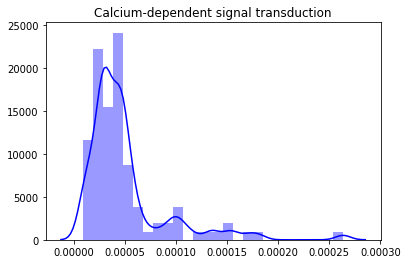

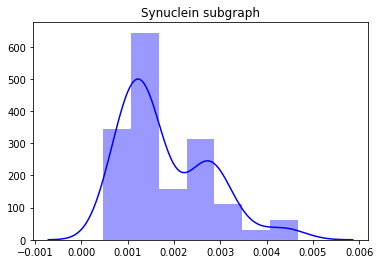

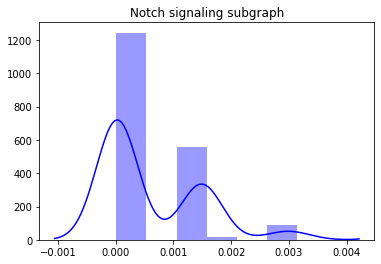

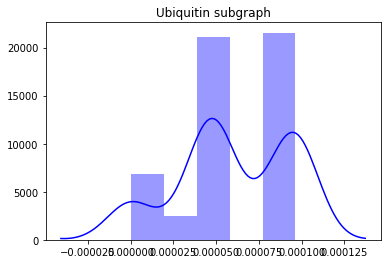

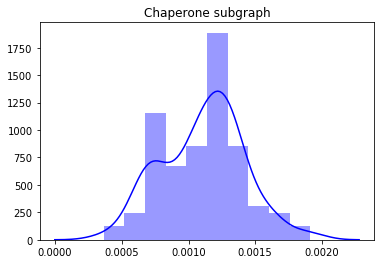

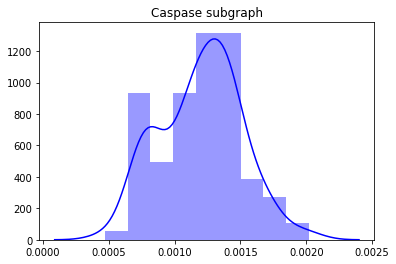

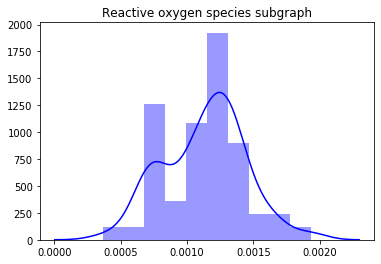

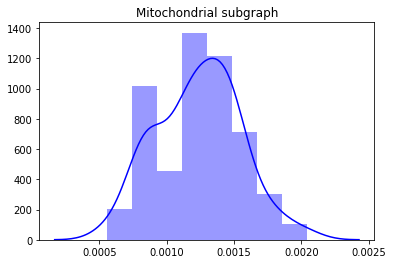

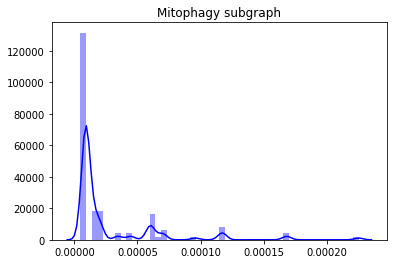

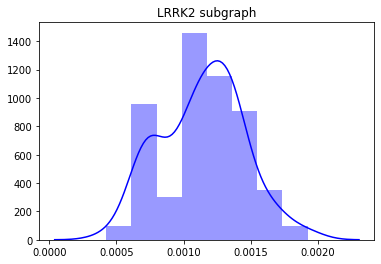

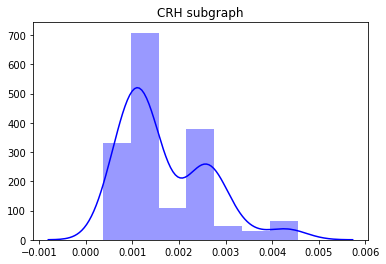

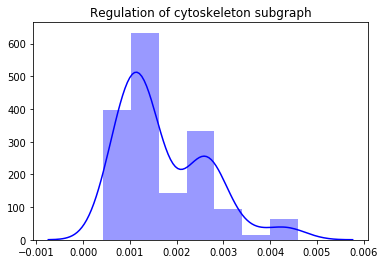

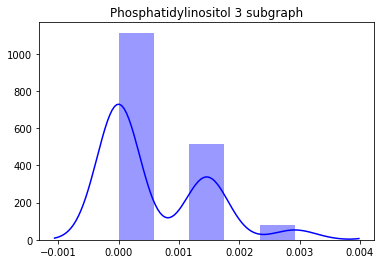

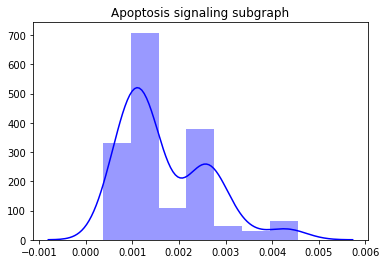

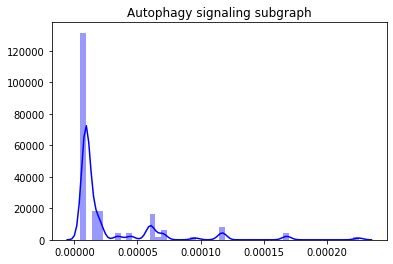

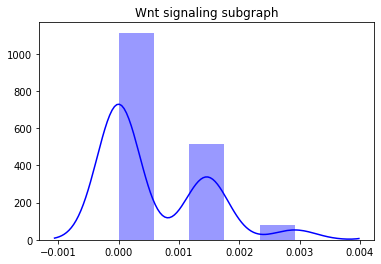

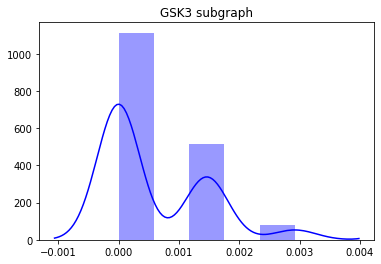

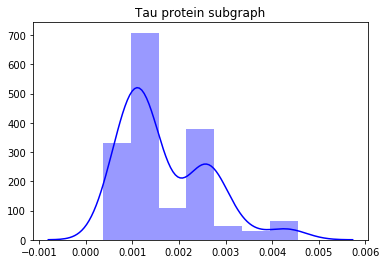

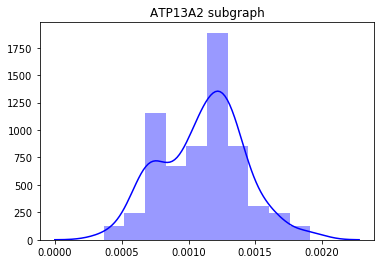

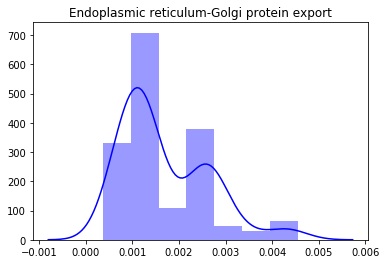

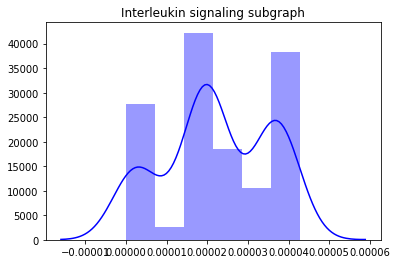

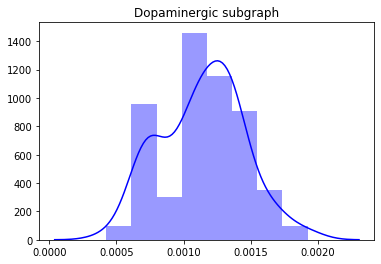

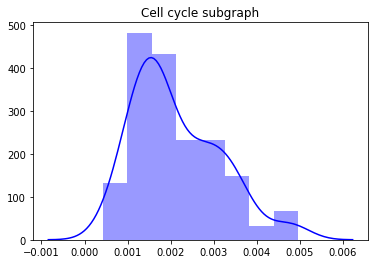

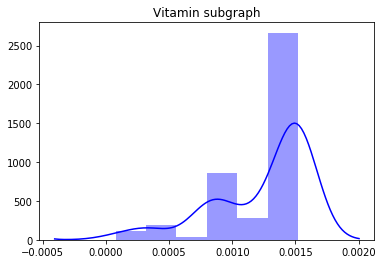

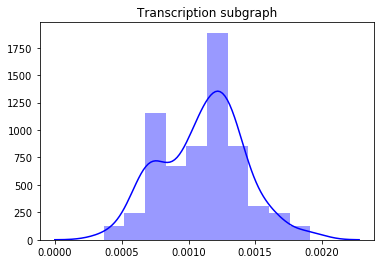

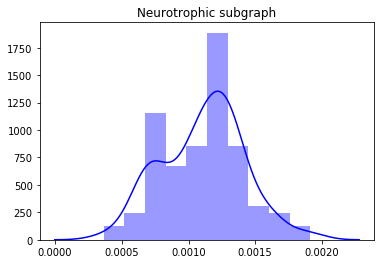

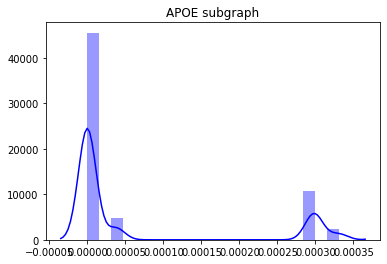

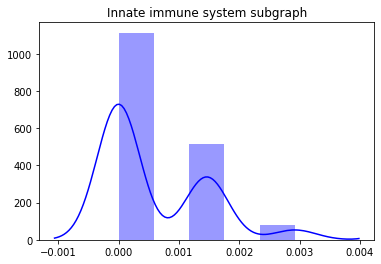

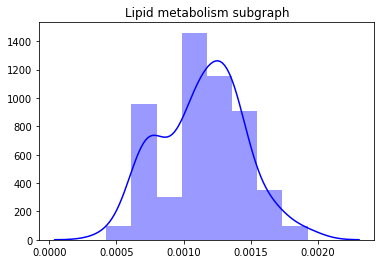

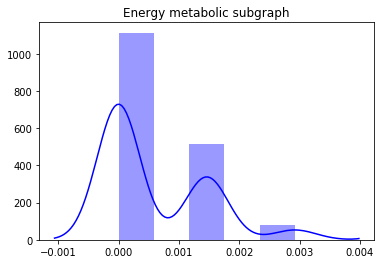

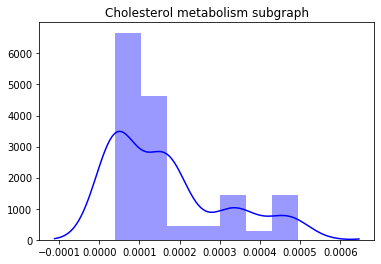

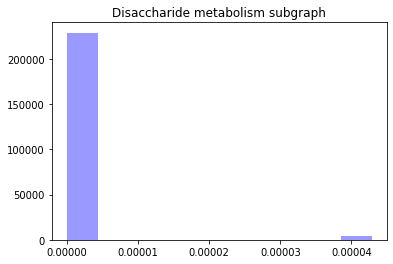

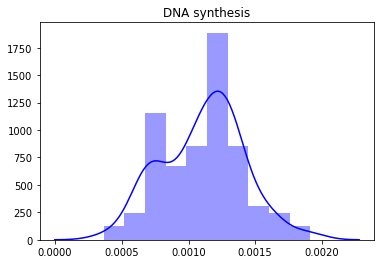

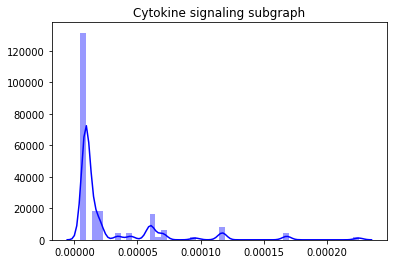

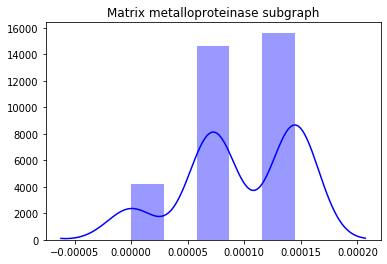

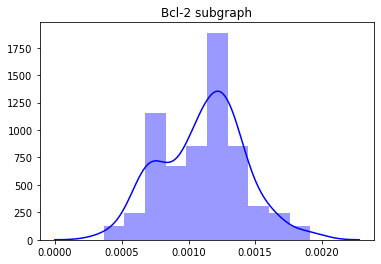

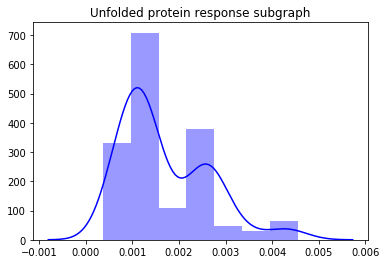

In [17]:
# plot them CADD13
for mechanism in CADD13_mechanisms_scores.columns[1:]:
    plt.figure(mechanism)
    sns.distplot(CADD13_mechanisms_scores[[mechanism]], hist=True, rug=False,color="Blue").set_title(mechanism)

/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures crea

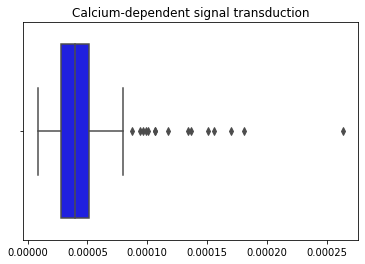

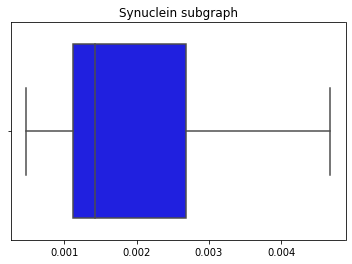

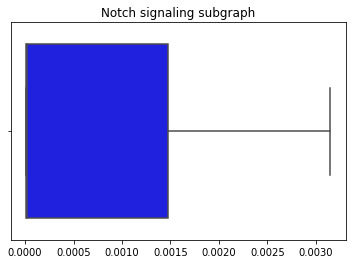

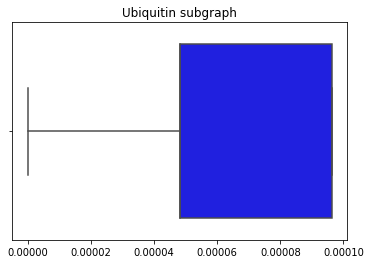

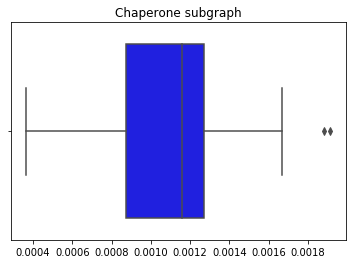

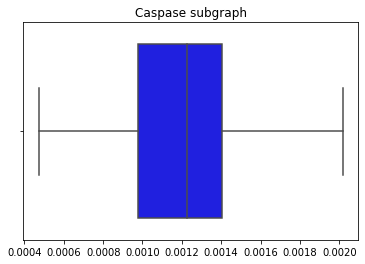

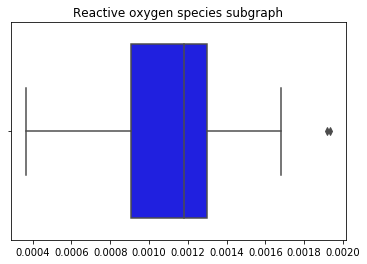

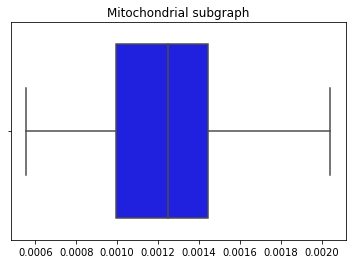

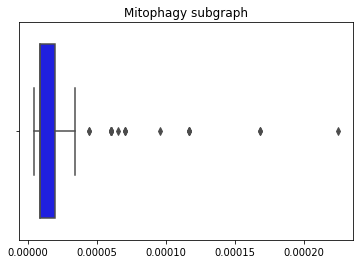

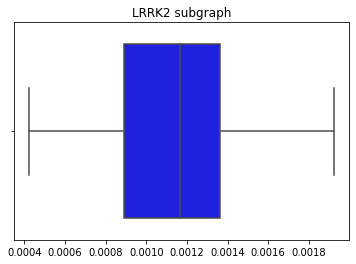

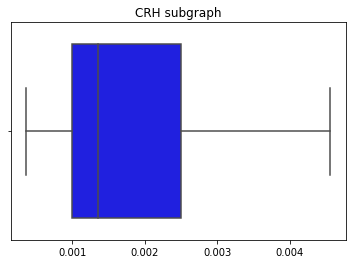

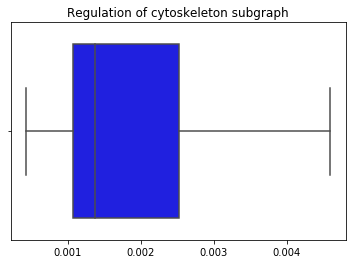

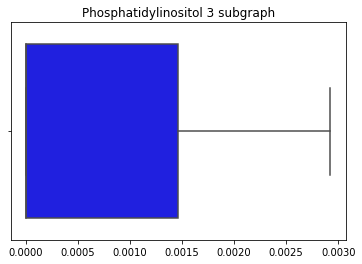

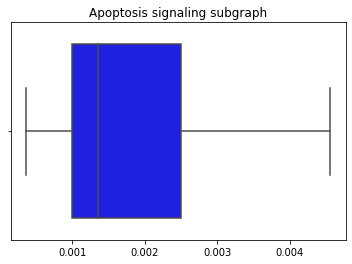

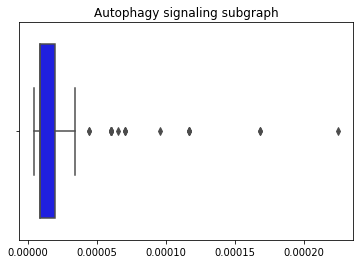

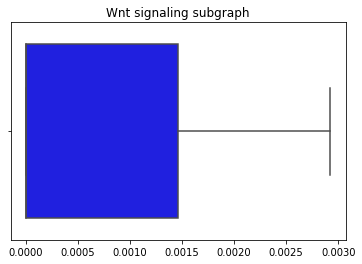

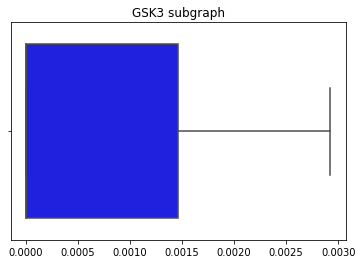

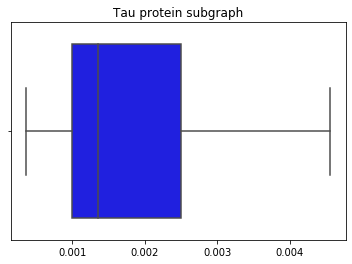

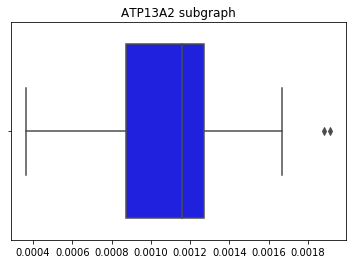

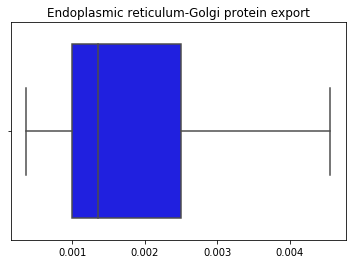

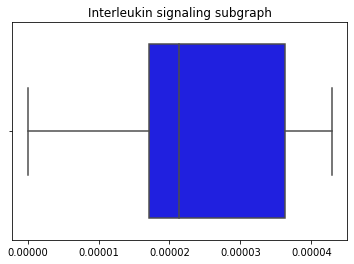

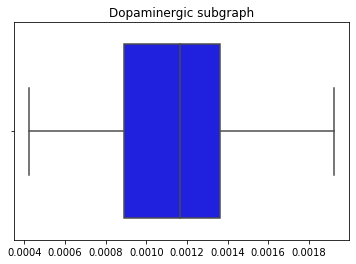

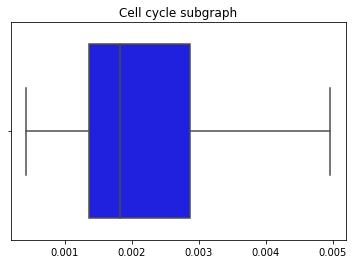

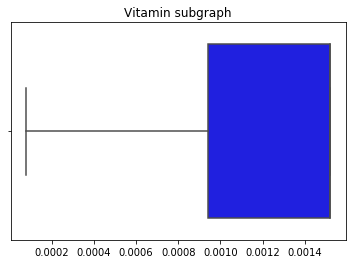

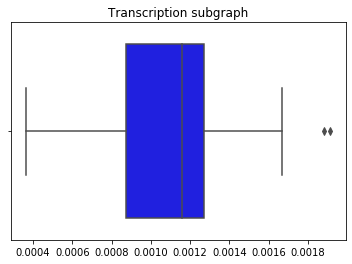

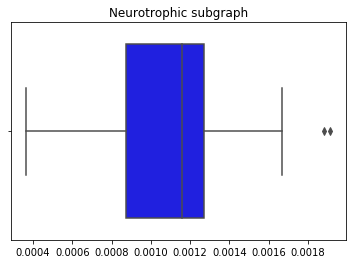

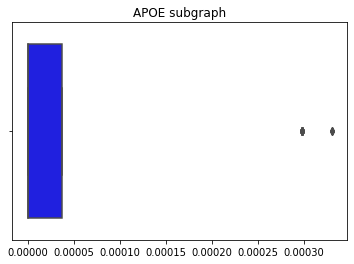

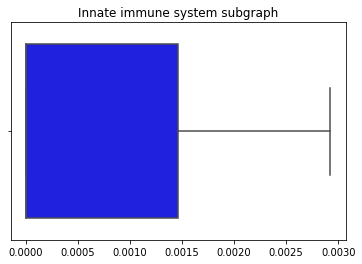

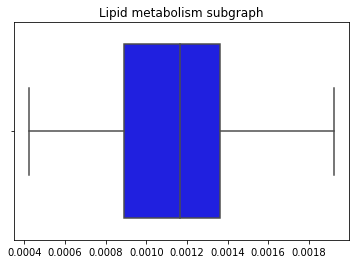

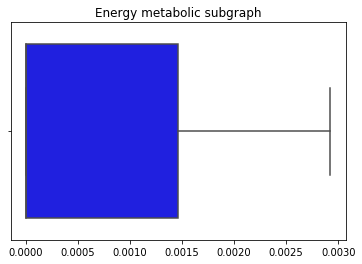

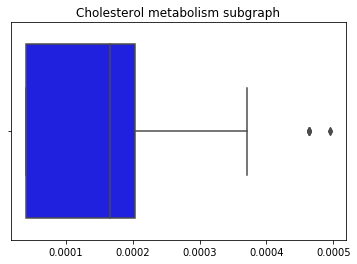

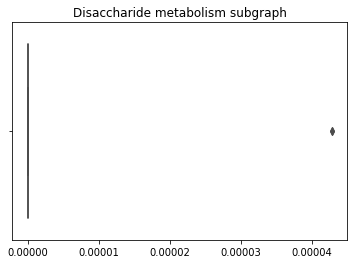

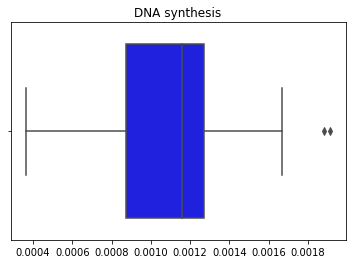

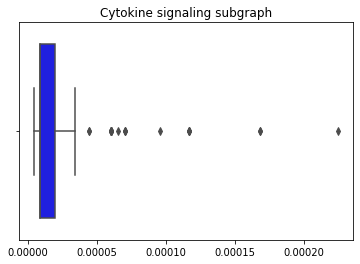

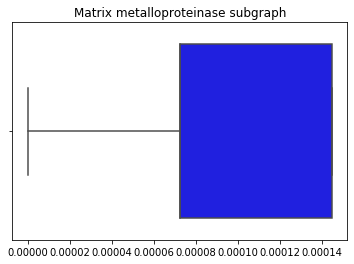

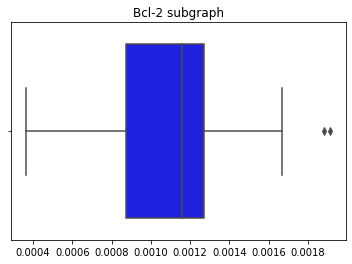

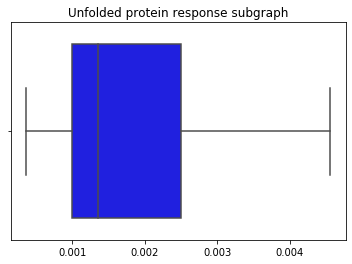

In [18]:
# plot them CADD13
for mechanism in CADD13_mechanisms_scores.columns[1:]:
    plt.figure(mechanism)
    sns.boxplot(CADD13_mechanisms_scores[[mechanism]],color="Blue").set_title(mechanism)

In [31]:
CADD13_cols=list(CADD13_mechanisms_scores.columns)
CADD13_indices=CADD13_mechanisms_scores.index
CADD13_indices

Index(['AET0044', 'AET0380', 'AET0027', 'AET0049', 'AET0006', 'AET0065',
       'AET0374', 'AET0002', 'AET0110', 'AET0372',
       ...
       'AET0035', 'AET0024', 'AET0113', 'AET0093', 'AET0396', 'AET0021',
       'AET0071', 'AET0138', 'AET0111', 'AET0390'],
      dtype='object', name='Sample', length=106)

In [12]:
#check for normalverteilung
for mech in CADD13_mechanisms_scores.columns:
    result_ks=stats.kstest(CADD13_mechanisms_scores[mech],'norm')
    print (mech,result_ks) #all pretty much normalverteilt

MAPK subgraph KstestResult(statistic=0.5000018112532083, pvalue=4.973590862342914e-25)
Calcium-dependent signal transduction KstestResult(statistic=0.5000036225039639, pvalue=4.971411645118801e-25)
Synuclein subgraph KstestResult(statistic=0.5001881958292309, pvalue=4.754222698952265e-25)
Notch signaling subgraph KstestResult(statistic=0.5000036225039639, pvalue=4.971411645118801e-25)
Ubiquitin subgraph KstestResult(statistic=0.5, pvalue=4.975771027434842e-25)
Chaperone subgraph KstestResult(statistic=0.5001449835138713, pvalue=4.804213935799745e-25)
Caspase subgraph KstestResult(statistic=0.5001881958292309, pvalue=4.754222698952265e-25)
Reactive oxygen species subgraph KstestResult(statistic=0.500145849959595, pvalue=4.803206476488388e-25)
Mitochondrial subgraph KstestResult(statistic=0.5002210897976284, pvalue=4.716513748531334e-25)
Mitophagy subgraph KstestResult(statistic=0.5000018112532083, pvalue=4.973590862342914e-25)
LRRK2 subgraph KstestResult(statistic=0.5001689762671295, pv

In [13]:
##################

In [14]:
# looks like some mechanisms show very little variance
# Variance Threshold feature reduction:
def variance_threshold_selector(data, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    print (selector.variances_)
    return data[data.columns[selector.get_support(indices=True)]]

In [104]:
CADD13_mechanisms_scores=variance_threshold_selector(CADD13_mechanisms_scores)

[1.46675445e-09 1.62294684e-09 8.88730572e-07 7.22223769e-07
 1.05732875e-09 9.19554778e-08 9.25215689e-08 9.20406287e-08
 9.49020074e-08 1.46675445e-09 9.32596247e-08 8.58836667e-07
 8.68968673e-07 7.11929155e-07 8.58836667e-07 1.46675445e-09
 7.11929155e-07 7.11929155e-07 8.58836667e-07 9.19554778e-08
 8.58836667e-07 1.61765251e-10 9.32596247e-08 1.01401868e-06
 1.47706173e-07 9.19554778e-08 9.19554778e-08 1.49730984e-08
 7.11929155e-07 9.32596247e-08 7.11929155e-07 1.92142078e-08
 3.39500815e-11 9.19554778e-08 1.46675445e-09 2.44582883e-09
 9.19554778e-08 8.58836667e-07]


In [15]:
CADD13_mechanisms_scores #all have low variance, we might wanna drop the lowest later

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Regulation of cytoskeleton subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
Sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,0.000009,0.000028,0.002736,0.001473,0.000096,0.001167,0.001273,0.001187,0.001249,0.000009,0.001176,0.002631,0.002640,0.001463,0.002631,0.000009,0.001463,0.001463,0.002631,0.001167,0.002631,0.000019,0.001176,0.003105,0.000943,0.001167,0.001167,0.000038,0.001463,0.001176,0.001463,0.000203,0.0,0.001167,0.000009,0.000072,0.001167,0.002631
AET0380,0.000009,0.000028,0.001414,0.000009,0.000048,0.001356,0.001414,0.001376,0.001510,0.000009,0.001365,0.001356,0.001365,0.000000,0.001356,0.000009,0.000000,0.000000,0.001356,0.001356,0.001356,0.000019,0.001365,0.002286,0.001521,0.001356,0.001356,0.000000,0.000000,0.001365,0.000000,0.000165,0.0,0.001356,0.000009,0.000145,0.001356,0.001356
AET0027,0.000060,0.000062,0.001408,0.000060,0.000096,0.000980,0.001136,0.000982,0.001112,0.000060,0.001040,0.000980,0.001040,0.000000,0.000980,0.000060,0.000000,0.000000,0.000980,0.000980,0.000980,0.000002,0.001040,0.001709,0.001521,0.000980,0.000980,0.000000,0.000000,0.001040,0.000000,0.000165,0.0,0.000980,0.000060,0.000072,0.000980,0.000980
AET0049,0.000009,0.000041,0.001481,0.000009,0.000096,0.001375,0.001481,0.001407,0.001529,0.000009,0.001384,0.001375,0.001384,0.000000,0.001375,0.000009,0.000000,0.000000,0.001375,0.001375,0.001375,0.000032,0.001384,0.001782,0.000947,0.001375,0.001375,0.000298,0.000000,0.001384,0.000000,0.000338,0.0,0.001375,0.000009,0.000145,0.001375,0.001375
AET0006,0.000060,0.000079,0.003162,0.001524,0.000000,0.001638,0.001698,0.001657,0.001698,0.000060,0.001698,0.003102,0.003162,0.001463,0.003102,0.000060,0.001463,0.001463,0.003102,0.001638,0.003102,0.000019,0.001698,0.003627,0.001521,0.001638,0.001638,0.000000,0.001463,0.001698,0.001463,0.000165,0.0,0.001638,0.000060,0.000000,0.001638,0.003102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.000060,0.000060,0.000651,0.000060,0.000096,0.000494,0.000651,0.000494,0.000554,0.000060,0.000554,0.000494,0.000554,0.000000,0.000494,0.000060,0.000000,0.000000,0.000494,0.000494,0.000494,0.000000,0.000554,0.001019,0.000802,0.000494,0.000494,0.000000,0.000000,0.000554,0.000000,0.000040,0.0,0.000494,0.000060,0.000000,0.000494,0.000494
AET0071,0.000009,0.000048,0.001186,0.000009,0.000096,0.001080,0.001186,0.001119,0.001234,0.000009,0.001089,0.001080,0.001089,0.000000,0.001080,0.000009,0.000000,0.000000,0.001080,0.001080,0.001080,0.000038,0.001089,0.001089,0.001521,0.001080,0.001080,0.000000,0.000000,0.001089,0.000000,0.000040,0.0,0.001080,0.000009,0.000145,0.001080,0.001080
AET0138,0.000070,0.000107,0.001429,0.000070,0.000096,0.001262,0.001429,0.001299,0.001405,0.000070,0.001333,0.001262,0.001333,0.000000,0.001262,0.000070,0.000000,0.000000,0.001262,0.001262,0.001262,0.000036,0.001333,0.001798,0.001521,0.001262,0.001262,0.000000,0.000000,0.001333,0.000000,0.000040,0.0,0.001262,0.000070,0.000072,0.001262,0.001262


In [107]:
#examine correlation
corr = CADD13_mechanisms_scores.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)
corr_output=corr.style.background_gradient(cmap='coolwarm').set_precision(3)#.render()
corr_output #high correlation, we might wanna put highly correlated mechanism together

In [40]:
#scale them
CADD13_mechanisms_scores_scaled= preprocessing.scale(CADD13_mechanisms_scores)

In [41]:
CADD13_mechanisms_scores_scaled=pd.DataFrame(CADD13_mechanisms_scores_scaled)
CADD13_mechanisms_scores_scaled.columns=CADD13_cols
CADD13_mechanisms_scores_scaled.index=CADD13_indices

In [61]:
CADD13_mechanisms_scores_scaled

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Regulation of cytoskeleton subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
Sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,-0.484502,-0.534158,0.976705,1.018326,1.119721,0.187927,0.246048,0.178072,0.047140,-0.484502,0.125847,1.015344,0.989502,1.047654,1.015344,-0.484502,1.047654,1.047654,1.015344,0.187927,1.015344,-0.232996,0.125847,0.961903,-0.774716,0.187927,0.187927,-0.231349,1.047654,0.125847,1.047654,0.266184,-0.138675,0.187927,-0.484502,-0.483460,0.187927,1.015344
AET0380,-0.484502,-0.534318,-0.426211,-0.703675,-0.361868,0.811301,0.709128,0.801136,0.895818,-0.484502,0.744847,-0.359794,-0.377596,-0.686753,-0.359794,-0.484502,-0.686753,-0.686753,-0.359794,0.811301,-0.359794,-0.233504,0.744847,0.148178,0.730333,0.811301,0.811301,-0.538842,-0.686753,0.744847,-0.686753,-0.005260,-0.138675,0.811301,-0.484502,0.980734,0.811301,-0.359794
AET0027,0.848736,0.308773,-0.431843,-0.643592,1.119721,-0.431345,-0.203460,-0.497286,-0.396694,0.848736,-0.321878,-0.766407,-0.727056,-0.686753,-0.766407,0.848736,-0.686753,-0.686753,-0.766407,-0.431345,-0.766407,-1.577669,-0.321878,-0.424166,0.730333,-0.431345,-0.431345,-0.538842,-0.686753,-0.321878,-0.686753,-0.005260,-0.138675,-0.431345,0.848736,-0.483460,-0.431345,-0.766407
AET0049,-0.484502,-0.215579,-0.355066,-0.703675,1.119721,0.873608,0.929628,0.905740,0.957150,-0.484502,0.806717,-0.339406,-0.357327,-0.686753,-0.339406,-0.484502,-0.686753,-0.686753,-0.339406,0.873608,-0.339406,0.776084,0.806717,-0.352289,-0.765232,0.873608,0.873608,1.897506,-0.686753,0.806717,-0.686753,1.241552,-0.138675,0.873608,-0.484502,0.980734,0.873608,-0.339406
AET0006,0.848736,0.733302,1.427964,1.078409,-1.843460,1.740171,1.644634,1.729598,1.505787,0.848736,1.834401,1.523262,1.549226,1.047654,1.523262,0.848736,1.047654,1.047654,1.523262,1.740171,1.523262,-0.232996,1.834401,1.480049,0.730333,1.740171,1.740171,-0.538842,1.047654,1.834401,1.047654,-0.005260,-0.138675,1.740171,0.848736,-1.947656,1.740171,1.523262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.848736,0.254862,-1.235702,-0.643592,1.119721,-2.032517,-1.799726,-2.104876,-2.207872,0.848736,-1.911816,-1.290335,-1.247920,-0.686753,-1.290335,0.848736,-0.686753,-0.686753,-1.290335,-2.032517,-1.290335,-1.748430,-1.911816,-1.109322,-1.141459,-2.032517,-2.032517,-0.538842,-0.686753,-1.911816,-0.686753,-0.909169,-0.138675,-2.032517,0.848736,-1.947656,-2.032517,-1.290335
AET0071,-0.484502,-0.057455,-0.668048,-0.703675,1.119721,-0.099396,-0.040395,-0.045817,-0.000630,-0.484502,-0.159460,-0.657788,-0.673848,-0.686753,-0.657788,-0.484502,-0.686753,-0.686753,-0.657788,-0.099396,-0.657788,1.276936,-0.159460,-1.039846,0.730333,-0.099396,-0.099396,-0.538842,-0.686753,-0.159460,-0.686753,-0.909169,-0.138675,-0.099396,-0.484502,0.980734,-0.099396,-0.657788
AET0138,1.112846,1.408750,-0.410084,-0.631690,1.119721,0.500829,0.759112,0.547181,0.553729,1.112846,0.636877,-0.461385,-0.412967,-0.686753,-0.461385,1.112846,-0.686753,-0.686753,-0.461385,0.500829,-0.461385,1.111167,0.636877,-0.336389,0.730333,0.500829,0.500829,-0.538842

In [8]:
##################################################################
## PCA ##

In [9]:
from sklearn.decomposition import PCA

In [10]:
CADD13_features=CADD13_mechanisms_scores.loc[:,list(CADD13_mechanisms_scores)].values #gettimg the scores

In [11]:
CADD13_features

array([[9.08027086e-06, 2.83546136e-05, 2.73623418e-03, ...,
        7.24122760e-05, 1.16738016e-03, 2.63080137e-03],
       [9.08027086e-06, 2.83481537e-05, 1.41366961e-03, ...,
        1.44824454e-04, 1.35641304e-03, 1.35641304e-03],
       [6.01409184e-05, 6.23127759e-05, 1.40836026e-03, ...,
        7.24122760e-05, 9.79591081e-04, 9.79591081e-04],
       ...,
       [7.02558945e-05, 1.06626239e-04, 1.42887353e-03, ...,
        7.24122760e-05, 1.26226509e-03, 1.26226509e-03],
       [9.08027086e-06, 4.76224733e-05, 2.64871625e-03, ...,
        0.00000000e+00, 1.08671641e-03, 2.54328344e-03],
       [9.08027086e-06, 4.32722983e-05, 1.12751710e-03, ...,
        0.00000000e+00, 1.07026052e-03, 1.07026052e-03]])

In [81]:
##### no scale ####

In [82]:
pca = PCA(n_components=10).fit(CADD13_features)
new_df = pca.transform(CADD13_features)
var_exp = pca.explained_variance_ratio_
var_cum=np.cumsum(np.round(var_exp,decimals=3)*100)

In [115]:
principalDf = pd.DataFrame(data = new_df
             , columns = [i for i in range(10)])

In [83]:
var_cum #first 3 comp explain almost everything

array([ 87.7,  97.8,  99. ,  99.6,  99.8,  99.9, 100. , 100. , 100. ,
       100. ])

In [105]:
pca.components_

array([[ 1.60540406e-03,  1.35265413e-03,  2.80585699e-01,
         2.47532095e-01,  5.15278838e-05,  3.10566245e-02,
         3.27135565e-02,  3.08038746e-02,  3.13298552e-02,
         1.60540406e-03,  3.26620286e-02,  2.76983315e-01,
         2.78588719e-01,  2.45926691e-01,  2.76983315e-01,
         1.60540406e-03,  2.45926691e-01,  2.45926691e-01,
         2.76983315e-01,  3.10566245e-02,  2.76983315e-01,
        -2.52749930e-04,  3.26620286e-02,  2.90241740e-01,
        -1.13232331e-02,  3.10566245e-02,  3.10566245e-02,
         4.18826467e-03,  2.45926691e-01,  3.26620286e-02,
         2.45926691e-01,  1.10289612e-03, -1.95133900e-04,
         3.10566245e-02,  1.60540406e-03, -1.33217341e-03,
         3.10566245e-02,  2.76983315e-01],
       [-4.53585065e-04, -2.42670887e-04,  7.08931108e-02,
        -1.79440484e-01, -2.31088595e-03,  2.52195213e-01,
         2.49430742e-01,  2.52406127e-01,  2.52757024e-01,
        -4.53585065e-04,  2.51741628e-01,  7.32083147e-02,
         7.27

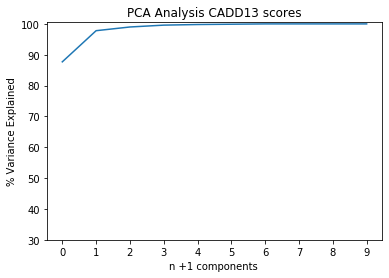

In [88]:
plt.ylabel('% Variance Explained')
plt.xlabel('n +1 components ')
plt.xticks([i for i in range(10)])
plt.title('PCA Analysis CADD13 scores')
plt.ylim(30,100.5)
plt.plot(var_cum)

In [85]:
print (pca.explained_variance_)
print(pd.DataFrame(pca.components_,columns=list(CADD13_mechanisms_scores)))

[1.11971543e-05 1.28495572e-06 1.49661701e-07 7.60813185e-08
 3.17458226e-08 1.54763553e-08 8.91282344e-09 4.52475396e-09
 1.86716573e-09 1.46431498e-09]
   MAPK subgraph  Calcium-dependent signal transduction  Synuclein subgraph  \
0       0.001605                               0.001353            0.280586   
1      -0.000454                              -0.000243            0.070893   
2      -0.006426                              -0.007484           -0.034832   
3       0.004074                               0.004434            0.009361   
4       0.018823                               0.026976           -0.029657   
5       0.281333                               0.285769            0.419491   
6      -0.147302                              -0.141681            0.833480   
7       0.052105                               0.026223           -0.051833   
8      -0.008328                              -0.014935           -0.053516   
9       0.029386                               0.070667 

In [12]:
################# scale ######################

In [13]:
CADD13_features_scaled = preprocessing.scale(CADD13_features)

In [14]:
pca_scaled = PCA(n_components=10).fit(CADD13_features_scaled)
new_df_scaled = pca_scaled.transform(CADD13_features_scaled)
var_exp_scaled = pca_scaled.explained_variance_ratio_
var_cum_scaled=np.cumsum(np.round(var_exp_scaled,decimals=3)*100)

In [18]:
principalDf_scaled = pd.DataFrame(data = new_df_scaled
             , columns = [i for i in range(10)])

In [19]:
principalDf_scaled

,0,1,2,3,4,5,6,7,8,9
0,3.189940,1.894934,-1.723609,-0.188578,-0.832131,0.699532,-0.019742,-0.418825,-0.291180,0.400873
1,0.300159,-3.460376,-0.748416,-0.148801,0.588147,-0.949976,-0.395029,0.239940,-0.443732,0.139240
2,-2.646557,-0.351968,1.821846,-1.096155,-1.586295,-0.067098,-0.791966,0.883264,-0.699439,0.083304
3,0.501464,-3.599681,-0.663071,2.491907,-0.717220,0.528938,-0.486433,-1.001594,-0.586683,-0.462677
4,7.814074,-1.424846,1.461331,-1.180856,0.391907,-0.062001,0.385525,1.249229,2.008030,0.284551
...,...,...,...,...,...,...,...,...,...,...
101,-7.149500,3.343887,1.730132,-1.834900,-2.590899,0.787313,1.015669,0.270431,-0.042873,-0.315405
102,-2.379976,-1.508920,-0.583033,-0.483725,1.051040,0.363710,-1.234442,-1.148209,-0.848757,-0.198346
103,-0.090879,-2.530230,2.856205,-1.157592,0.260132,1.199142,-1.119406,-0.769146,-0.206437,-0.445612
104,2.385407,2.518757,-1.403970,-0.940156,0.151138,1.773116,-1.318452,-0.421820,1.322568,0.179606


In [15]:
var_cum_scaled # completely different to non scaled, would consider first 5

array([44.3, 68.5, 81.3, 86.7, 90. , 92.7, 95.3, 97.6, 99.5, 99.8])

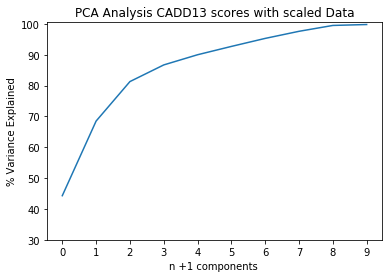

In [16]:
#plot this
plt.ylabel('% Variance Explained')
plt.xlabel('n +1 components ')
plt.xticks([i for i in range(10)])
plt.title('PCA Analysis CADD13 scores with scaled Data')
plt.ylim(30,100.5)
plt.plot(var_cum_scaled)

In [17]:
print (pca_scaled.explained_variance_)
print(pd.DataFrame(pca_scaled.components_,columns=list(CADD13_mechanisms_scores)))

[17.00565017  9.2808726   4.91162688  2.08074635  1.26362787  1.04548711
  0.97857275  0.86906721  0.72929636  0.11705926]
   MAPK subgraph  Calcium-dependent signal transduction  Synuclein subgraph  \
0       0.041007                               0.035107            0.222195   
1       0.048555                               0.040949            0.129703   
2       0.439901                               0.431657           -0.025103   
3      -0.027852                               0.035062           -0.009108   
4      -0.057921                               0.125772            0.008245   
5      -0.006305                               0.118588            0.012471   
6       0.012087                              -0.040506           -0.032981   
7       0.030192                              -0.143078           -0.015029   
8      -0.049053                               0.040251           -0.030994   
9       0.000931                              -0.001498           -0.004416   

   Notc

#### dann scores feature examination

In [9]:
dann_mechanisms_scores=pd.read_csv("../Input_for_Models/dann_mechanisms_scores.csv")
dann_mechanisms_scores=dann_mechanisms_scores.rename({"Unnamed: 0":"Sample"},axis=1)
dann_mechanisms_scores=dann_mechanisms_scores.set_index("Sample")
dann_mechanisms_scores

,MAPK subgraph,Calcium-dependent signal transduction,GRB10 subgraph,Synuclein subgraph,Notch signaling subgraph,Calsyntenin subgraph,Ubiquitin subgraph,Chaperone subgraph,PINK1 subgraph,Caspase subgraph,Reactive oxygen species subgraph,miRNA subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Pre-translational events,Regulation of cytoskeleton subgraph,Akt/mTOR subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Tumor necrosis factor subgraph,Response to oxidative stress,Nitric oxide subgraph,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Transport related subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,GABA subgraph,Innate immune system subgraph,Folate metabolic subgraph,Lipid metabolism subgraph,G-protein-mediated signaling,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,Interferon signaling subgraph,Nuclear factor Kappa beta subgraph,Insulin signal transduction,Mitochondria fission subgraph,DNA synthesis,Post-translational events,FMR1 subgraph,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,RhoA subgraph,Bcl-2 subgraph,Mitochondria fusion subgraph,Unfolded protein response subgraph,Vascular endothelial growth factor subgraph,Amyloidogenic subgraph,Toll like receptor subgraph,Estrogen subgraph,Cyclic AMP subgraph
Sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,0.000025,0.000079,0,0.008420,0.004693,0,0.000273,0.003454,0,0.003752,0.003508,0,0.003802,0.000025,0.003479,0.008121,0,0.008146,0,0.004668,0.008121,0.000025,0.004668,0.004668,0.008121,0.003454,0.008121,0,0,0,0.000054,0.003479,0.009563,0,0.002959,0.003454,0.003454,0.000056,0,0.004668,0,0.003479,0,0.004668,0.000595,0.0,0,0,0,0,0.003454,0,0,0.000025,0.000323,0,0.003454,0,0.008121,0,0,0,0,0
AET0380,0.000025,0.000078,0,0.004493,0.000025,0,0.000137,0.004331,0,0.004493,0.004384,0,0.005003,0.000025,0.004356,0.004331,0,0.004356,0,0.000000,0.004331,0.000025,0.000000,0.000000,0.004331,0.004331,0.004331,0,0,0,0.000053,0.004356,0.007156,0,0.004765,0.004331,0.004331,0.000000,0,0.000000,0,0.004356,0,0.000000,0.000540,0.0,0,0,0,0,0.004331,0,0,0.000025,0.000647,0,0.004331,0,0.004331,0,0,0,0,0
AET0027,0.000177,0.000182,0,0.004198,0.000177,0,0.000273,0.002911,0,0.003361,0.002916,0,0.003411,0.000177,0.003087,0.002911,0,0.003087,0,0.000000,0.002911,0.000177,0.000000,0.000000,0.002911,0.002911,0.002911,0,0,0,0.000006,0.003087,0.005103,0,0.004765,0.002911,0.002911,0.000000,0,0.000000,0,0.003087,0,0.000000,0.000540,0.0,0,0,0,0,0.002911,0,0,0.000177,0.000323,0,0.002911,0,0.002911,0,0,0,0,0
AET0049,0.000025,0.000112,0,0.004479,0.000025,0,0.000273,0.004180,0,0.004479,0.004268,0,0.004852,0.000025,0.004205,0.004180,0,0.004205,0,0.000000,0.004180,0.000025,0.000000,0.000000,0.004180,0.004180,0.004180,0,0,0,0.000087,0.004205,0.005384,0,0.002969,0.004180,0.004180,0.000982,0,0.000000,0,0.004205,0,0.000000,0.001098,0.0,0,0,0,0,0.004180,0,0,0.000025,0.000647,0,0.004180,0,0.004180,0,0,0,0,0
AET0006,0.000177,0.000231,0,0.009923,0.004844,0,0.000000,0.005079,0,0.005256,0.005133,0,0.005256,0.000177,0.005256,0.009747,0,0.009923,0,0.004668,0.009747,0.000177,0.004668,0.004668,0.009747,0.005079,0.009747,0,0,0,0.000054,0.005256,0.011340,0,0.004765,0.005079,0.005079,0.000000,0,0.004668,0,0.005256,0,0.004668,0.000540,0.0,0,0,0,0,0.005079,0,0,0.000177,0.000000,0,0.005079,0,0.009747,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.000177,0.000177,0,0.001916,0.000177,0,0.000273,0.001466,0,0.001916,0.001466,0,0.001642,0.000177,0.001642,0.001466,0,0.001642,0,

In [10]:
#drop zeros
dann_mechanisms_scores = dann_mechanisms_scores.loc[:, (dann_mechanisms_scores != 0).any(axis=0)]

In [12]:
dann_mechanisms_scores.describe()

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Regulation of cytoskeleton subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.000082,0.000143,0.005606,0.001929,0.000171,0.003391,0.003643,0.003452,0.003902,0.000082,0.003472,0.005238,0.005320,0.001847,0.005238,0.000082,0.001847,0.001847,0.005238,0.003391,0.005238,0.000061,0.003472,0.006595,0.003892,0.003391,0.003391,0.000210,0.001847,0.003472,0.001847,0.000529,0.000004,0.003391,0.000082,0.000430,0.003391,0.005238
std,0.000118,0.000123,0.003013,0.002722,0.000093,0.000973,0.000974,0.000973,0.000996,0.000118,0.000979,0.002965,0.002982,0.002703,0.002965,0.000118,0.002703,0.002703,0.002965,0.000973,0.002965,0.000035,0.000979,0.003210,0.001204,0.000973,0.000973,0.000402,0.002703,0.000979,0.002703,0.000459,0.000026,0.000973,0.000118,0.000222,0.000973,0.002965
min,0.000012,0.000025,0.001384,0.000025,0.000000,0.001070,0.001384,0.001076,0.001642,0.000012,0.001247,0.001070,0.001247,0.000000,0.001070,0.000012,0.000000,0.000000,0.001070,0.001070,0.001070,0.000000,0.001247,0.001247,0.000284,0.001070,0.001070,0.000000,0.000000,0.001247,0.000000,0.000117,0.000000,0.001070,0.000012,0.000000,0.001070,0.001070
25%,0.000025,0.000078,0.003362,0.000025,0.000137,0.002608,0.002879,0.002692,0.003107,0.000025,0.002633,0.003009,0.003181,0.000000,0.003009,0.000025,0.000000,0.000000,0.003009,0.002608,0.003009,0.000047,0.002633,0.004239,0.002959,0.002608,0.002608,0.000000,0.000000,0.002633,0.000000,0.000117,0.000000,0.002608,0.000025,0.000323,0.002608,0.003009
50%,0.000025,0.000113,0.004489,0.000062,0.000137,0.003442,0.003661,0.003492,0.003901,0.000025,0.003481,0.004247,0.004347,0.000000,0.004247,0.000025,0.000000,0.000000,0.004247,0.003442,0.004247,0.000055,0.003481,0.005543,0.004765,0.003442,0.003442,0.000000,0.000000,0.003481,0.000000,0.000540,0.000000,0.003442,0.000025,0.000323,0.003442,0.004247
75%,0.000062,0.000141,0.008309,0.004693,0.000273,0.003927,0.004389,0.004006,0.004675,0.000062,0.004193,0.007877,0.007912,0.004668,0.007877,0.000062,0.004668,0.004668,0.007877,0.003927,0.007877,0.000099,0.004193,0.008913,0.004765,0.003927,0.003927,0.000056,0.004668,0.004193,0.004668,0.000595,0.000000,0.003927,0.000062,0.000647,0.003927,0.007877
max,0.000698,0.000802,0.014754,0.010021,0.000273,0.005808,0.006106,0.005868,0.006446,0.000698,0.005833,0.014413,0.014521,0.009323,0.014413,0.000698,0.009323,0.009323,0.014413,0.005808,0.014413,0.000119,0.005833,0.015645,0.004765,0.005808,0.005808,0.001029,0.009323,0.005833,0.009323,0.001569,0.000188,0.005808,0.000698,0.000647,0.005808,0.014413


In [13]:
dann_mechanisms_scores.describe().to_csv("../../Documents/dann_describe.csv")

/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures crea

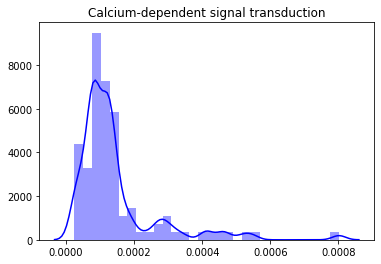

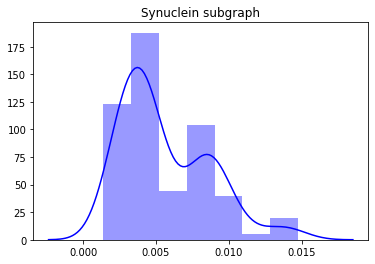

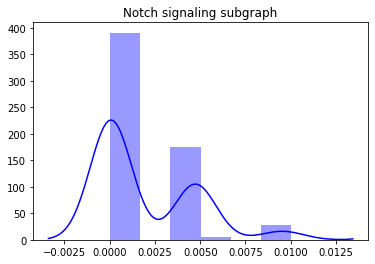

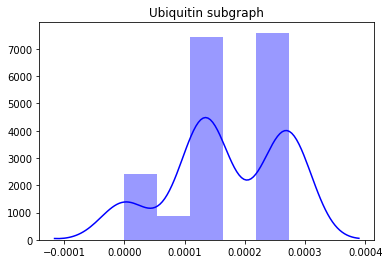

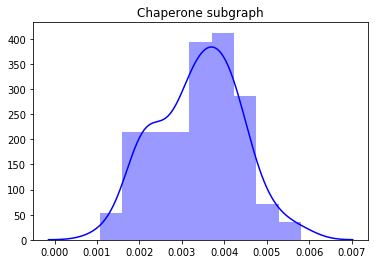

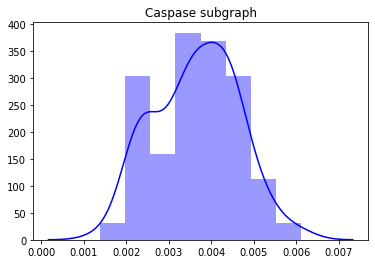

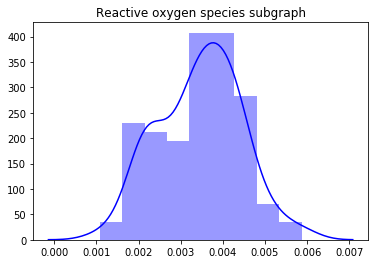

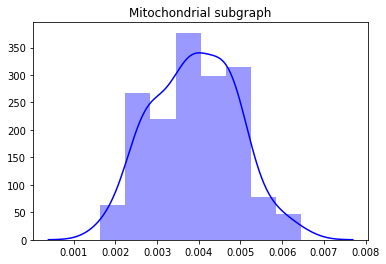

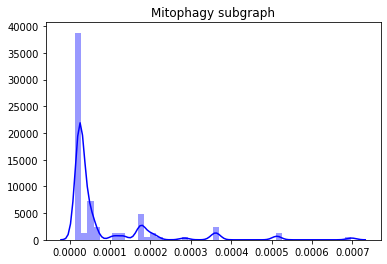

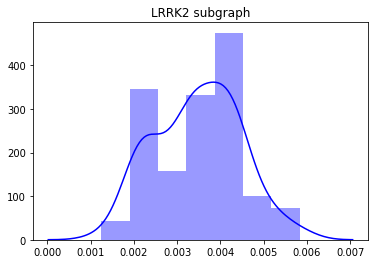

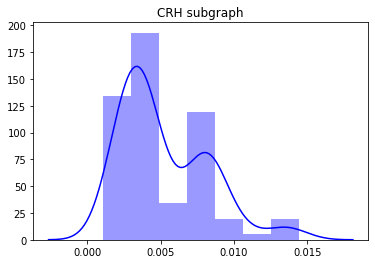

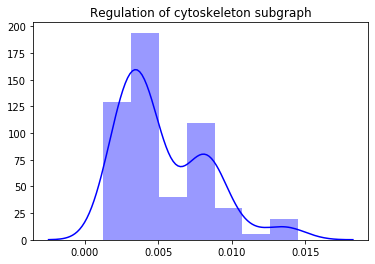

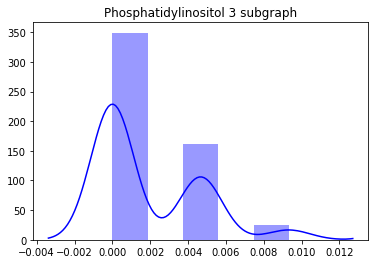

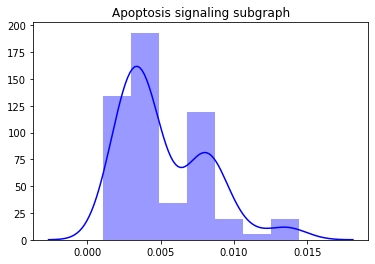

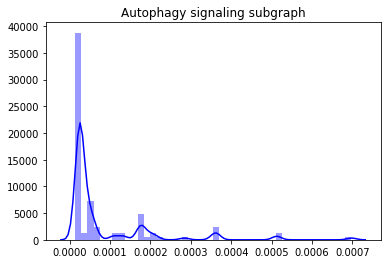

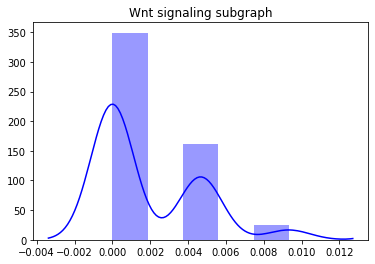

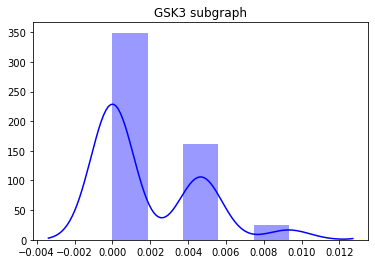

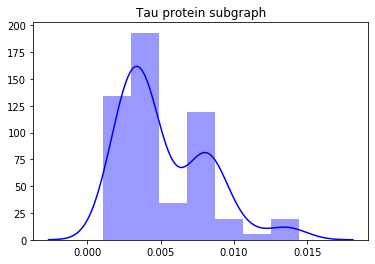

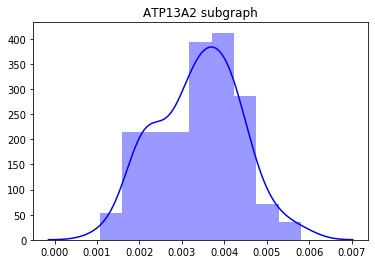

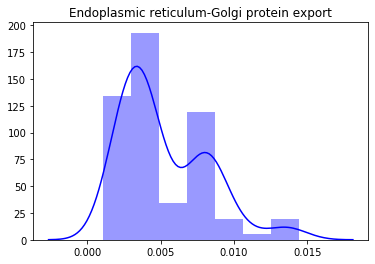

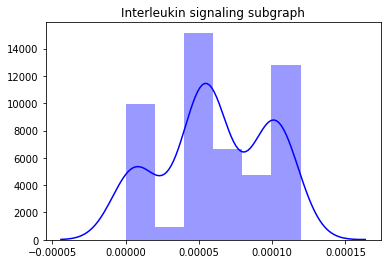

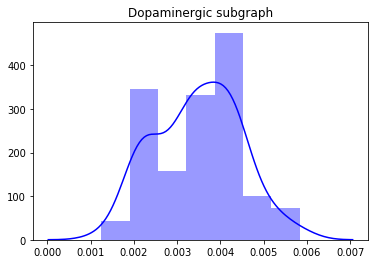

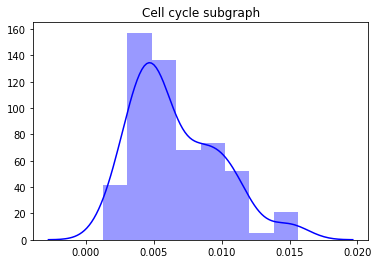

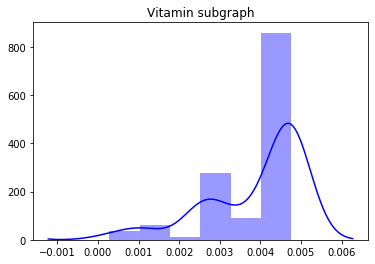

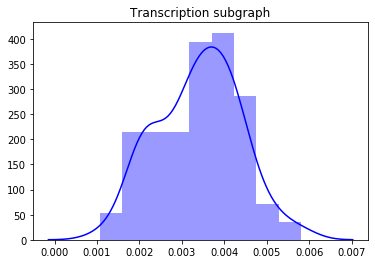

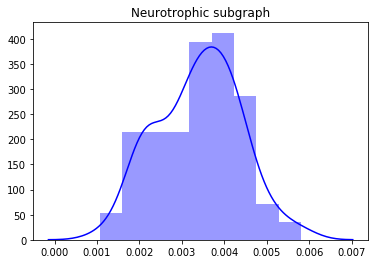

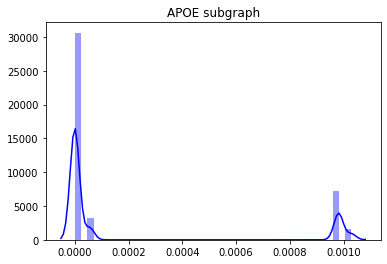

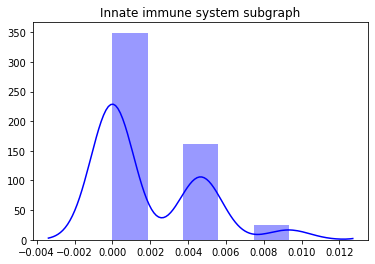

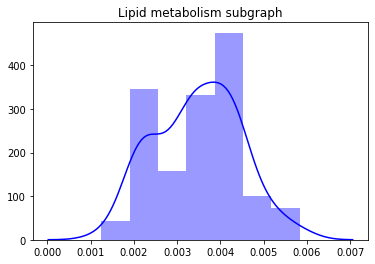

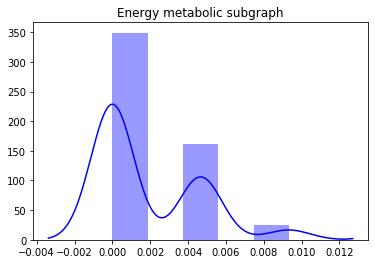

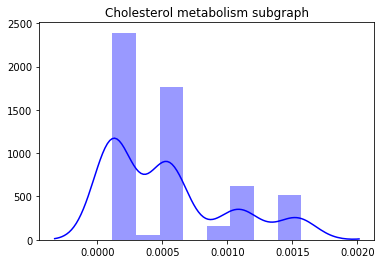

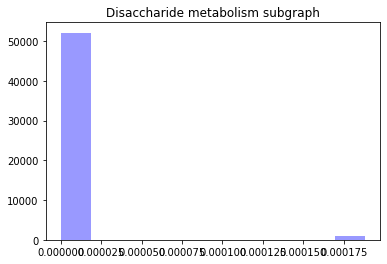

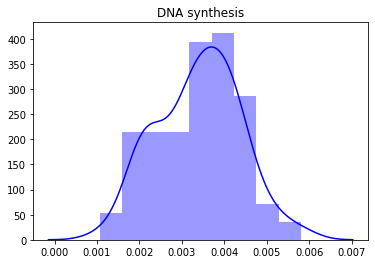

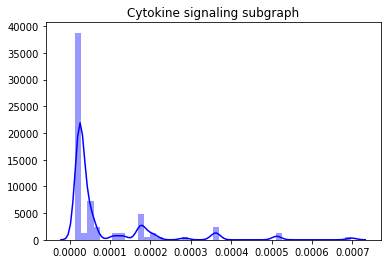

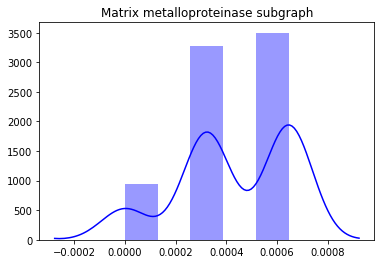

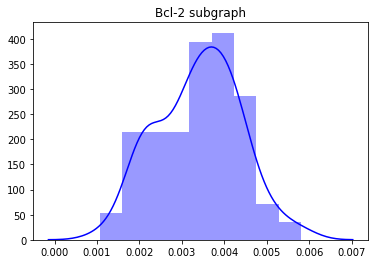

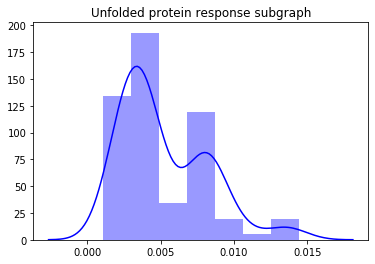

In [111]:
# plot them dann
for mechanism in dann_mechanisms_scores.columns[1:]:
    plt.figure(mechanism)
    sns.distplot(dann_mechanisms_scores[[mechanism]], hist=True, rug=False,color="Blue").set_title(mechanism)

/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, 

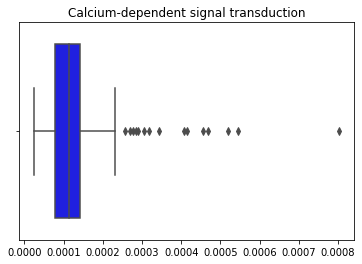

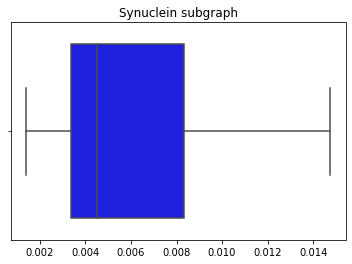

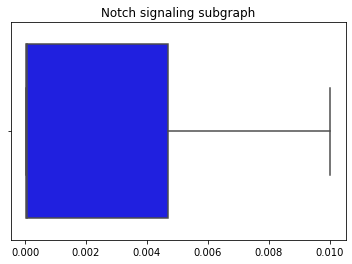

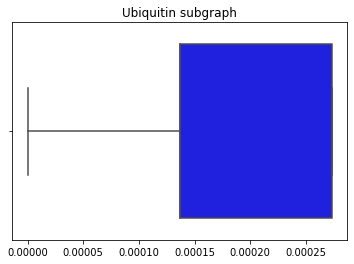

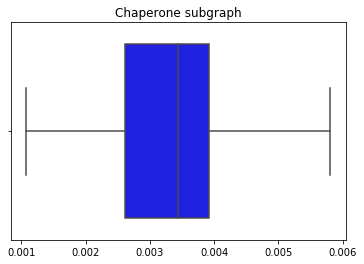

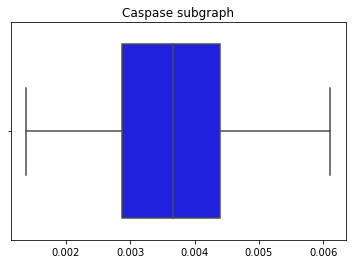

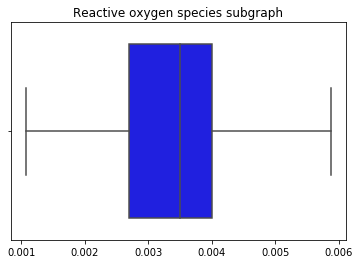

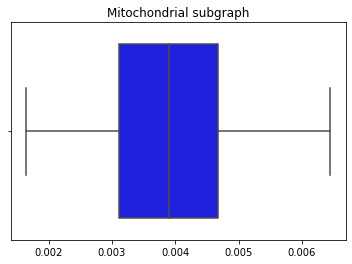

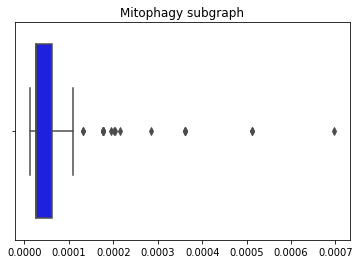

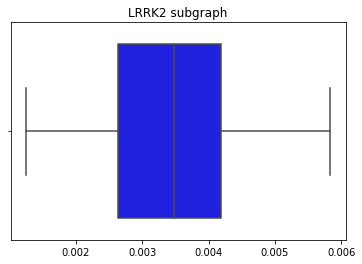

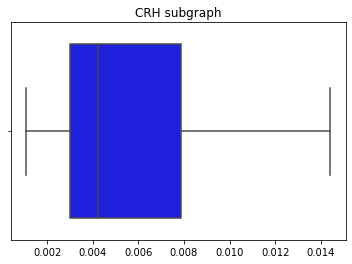

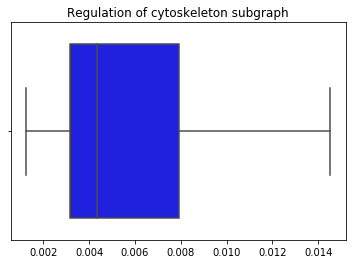

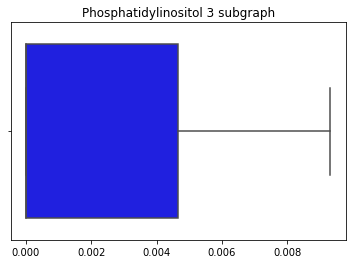

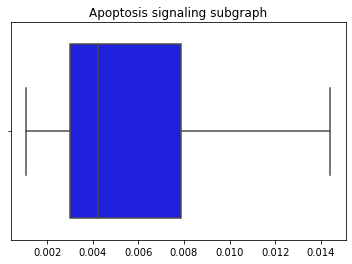

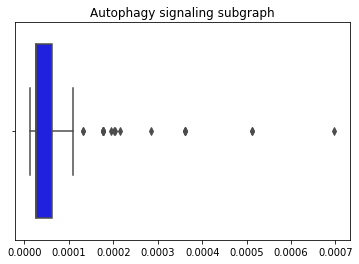

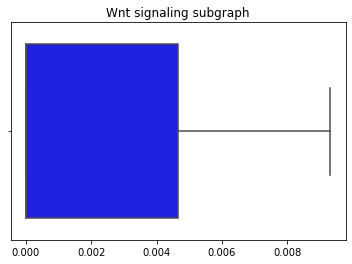

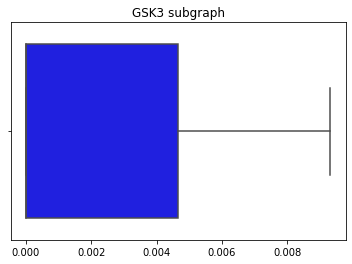

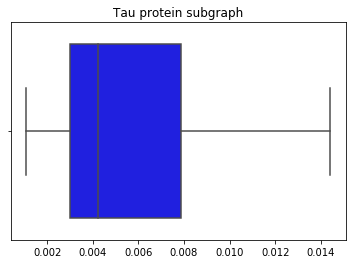

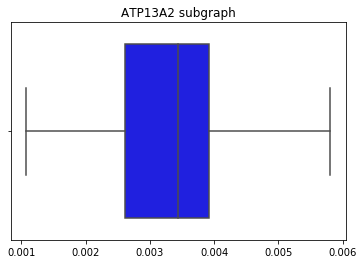

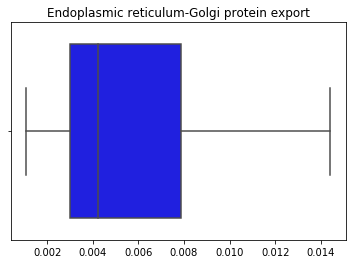

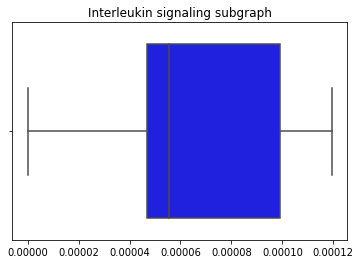

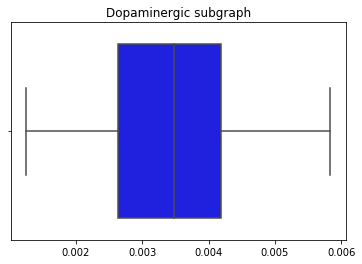

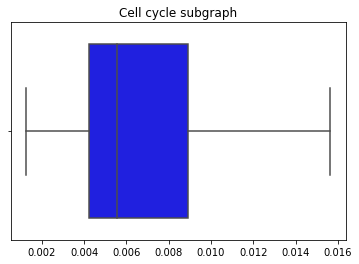

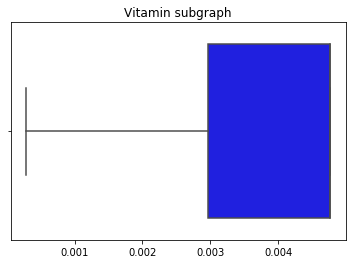

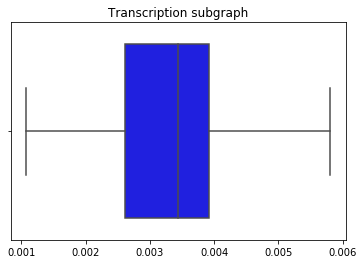

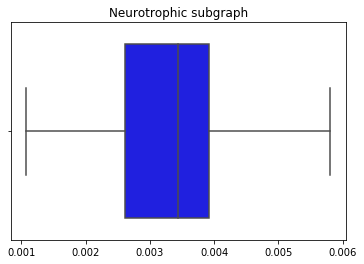

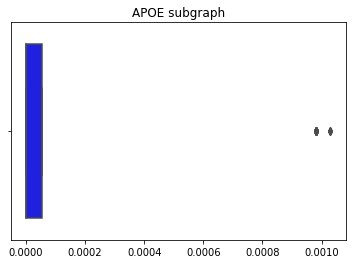

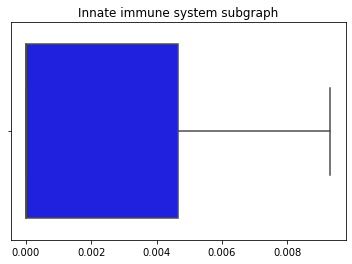

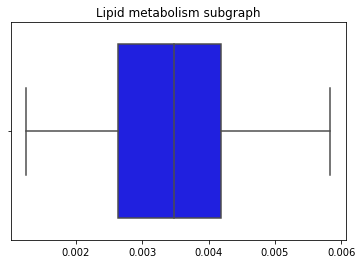

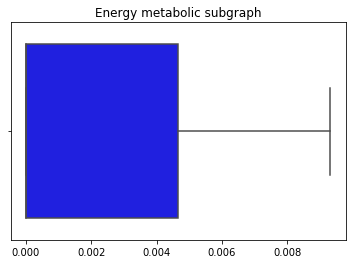

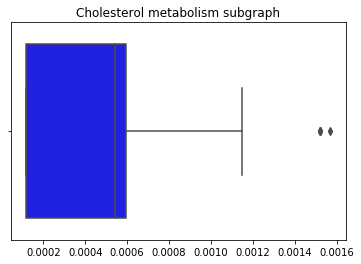

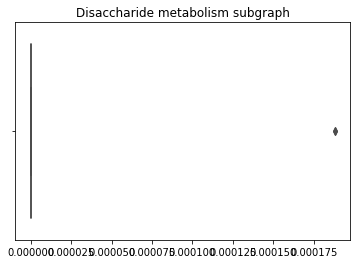

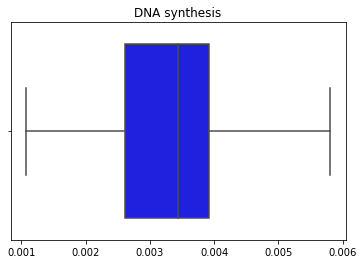

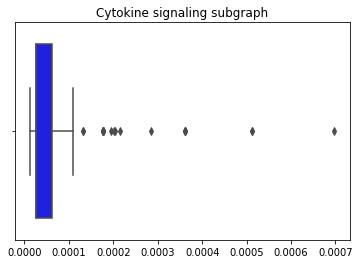

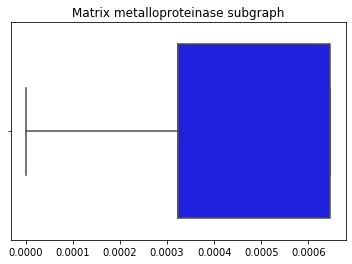

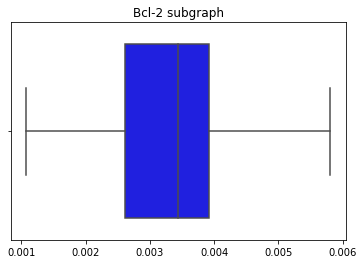

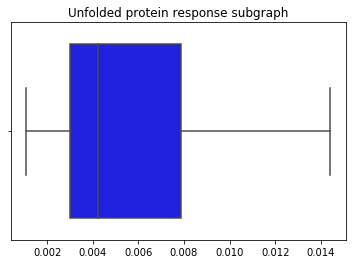

In [19]:
for mechanism in dann_mechanisms_scores.columns[1:]:
    plt.figure(mechanism)
    sns.boxplot(dann_mechanisms_scores[[mechanism]],color="Blue").set_title(mechanism)

In [112]:
dann_mechanisms_scores=variance_threshold_selector(dann_mechanisms_scores) #very low variance as well, keep them, might drop some very low later

[1.38672016e-08 1.50276341e-08 8.99515085e-06 7.33953518e-06
 8.51971756e-09 9.37089771e-07 9.39390849e-07 9.36967104e-07
 9.83315667e-07 1.38672016e-08 9.48909676e-07 8.71059259e-06
 8.81027078e-06 7.23780969e-06 8.71059259e-06 1.38672016e-08
 7.23780969e-06 7.23780969e-06 8.71059259e-06 9.37089771e-07
 8.71059259e-06 1.23201377e-09 9.48909676e-07 1.02056104e-05
 1.43669388e-06 9.37089771e-07 9.37089771e-07 1.59842869e-07
 7.23780969e-06 9.48909676e-07 7.23780969e-06 2.08994440e-07
 6.55955543e-10 9.37089771e-07 1.38672016e-08 4.87819390e-08
 9.37089771e-07 8.71059259e-06]


In [62]:
dann_cols=list(dann_mechanisms_scores.columns)
dann_indices=dann_mechanisms_scores.index

In [114]:
corr = dann_mechanisms_scores.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(3)
corr_output=corr.style.background_gradient(cmap='coolwarm').set_precision(3)#.render()
corr_output #high correlation  between some of them, we might wanna merge some later

In [66]:
#scale them
dann_mechanisms_scores_scaled = preprocessing.scale(dann_mechanisms_scores)

In [67]:
dann_mechanisms_scores_scaled=pd.DataFrame(dann_mechanisms_scores_scaled)
dann_mechanisms_scores_scaled = dann_mechanisms_scores_scaled.set_axis(dann_cols, axis=1, inplace=False)
dann_mechanisms_scores_scaled.index=dann_indices

In [69]:
dann_mechanisms_scores_scaled

,MAPK subgraph,Calcium-dependent signal transduction,Synuclein subgraph,Notch signaling subgraph,Ubiquitin subgraph,Chaperone subgraph,Caspase subgraph,Reactive oxygen species subgraph,Mitochondrial subgraph,Mitophagy subgraph,LRRK2 subgraph,CRH subgraph,Regulation of cytoskeleton subgraph,Phosphatidylinositol 3 subgraph,Apoptosis signaling subgraph,Autophagy signaling subgraph,Wnt signaling subgraph,GSK3 subgraph,Tau protein subgraph,ATP13A2 subgraph,Endoplasmic reticulum-Golgi protein export,Interleukin signaling subgraph,Dopaminergic subgraph,Cell cycle subgraph,Vitamin subgraph,Transcription subgraph,Neurotrophic subgraph,APOE subgraph,Innate immune system subgraph,Lipid metabolism subgraph,Energy metabolic subgraph,Cholesterol metabolism subgraph,Disaccharide metabolism subgraph,DNA synthesis,Cytokine signaling subgraph,Matrix metalloproteinase subgraph,Bcl-2 subgraph,Unfolded protein response subgraph
Sample,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AET0044,-0.481286,-0.520376,0.938136,1.020087,1.111860,0.065285,0.112616,0.057938,-0.101104,-0.481286,0.006696,0.976986,0.952350,1.048297,0.976986,-0.481286,1.048297,1.048297,0.976986,0.065285,0.976986,-0.202727,0.006696,0.929235,-0.778832,0.065285,0.065285,-0.385402,1.048297,0.006696,1.048297,0.144222,-0.138675,0.065285,-0.481286,-0.483460,0.065285,0.976986
AET0380,-0.481286,-0.531934,-0.371179,-0.702864,-0.369448,0.971851,0.877000,0.963100,1.110019,-0.481286,0.907597,-0.307216,-0.324568,-0.686719,-0.307216,-0.481286,-0.686719,-0.686719,-0.307216,0.971851,-0.307216,-0.243092,0.907597,0.175587,0.728407,0.971851,0.971851,-0.524569,-0.686719,0.907597,-0.686719,0.022515,-0.138675,0.971851,-0.481286,0.980734,0.971851,-0.307216
AET0027,0.805779,0.321082,-0.469557,-0.646919,1.111860,-0.495614,-0.291220,-0.553011,-0.495817,0.805779,-0.395109,-0.788537,-0.752095,-0.686719,-0.788537,0.805779,-0.686719,-0.686719,-0.788537,-0.495614,-0.788537,-1.581972,-0.395109,-0.467018,0.728407,-0.495614,-0.495614,-0.524569,-0.686719,-0.395109,-0.686719,0.022515,-0.138675,-0.495614,0.805779,-0.483460,-0.495614,-0.788537
AET0049,-0.481286,-0.249085,-0.375884,-0.702864,1.111860,0.816030,0.862441,0.843089,0.957905,-0.481286,0.752750,-0.358325,-0.375386,-0.686719,-0.358325,-0.481286,-0.686719,-0.686719,-0.358325,0.816030,-0.358325,0.744760,0.752750,-0.379075,-0.770523,0.816030,0.816030,1.930534,-0.686719,0.752750,-0.686719,1.244569,-0.138675,0.816030,-0.481286,0.980734,0.816030,-0.358325
AET0006,0.805779,0.715997,1.439416,1.076032,-1.850757,1.744284,1.663793,1.737047,1.364675,0.805779,1.830795,1.527689,1.550990,1.048297,1.527689,0.805779,1.048297,1.048297,1.527689,1.744284,1.527689,-0.202727,1.830795,1.485449,0.728407,1.744284,1.744284,-0.524569,1.048297,1.830795,1.048297,0.022515,-0.138675,1.744284,0.805779,-1.947656,1.744284,1.527689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.805779,0.274955,-1.230544,-0.646919,1.111860,-1.988471,-1.782247,-2.051808,-2.279286,0.805779,-1.878639,-1.278186,-1.238967,-0.686719,-1.278186,0.805779,-0.686719,-0.686719,-1.278186,-1.988471,-1.278186,-1.743070,-1.878639,-1.106776,-1.140689,-1.988471,-1.988471,-0.524569,-0.686719,-1.878639,-0.686719,-0.902515,-0.138675,-1.988471,0.805779,-1.947656,-1.988471,-1.278186
AET0071,-0.481286,-0.113801,-0.655009,-0.702864,1.111860,-0.048763,-0.001293,-0.004628,0.113683,-0.481286,-0.106640,-0.641972,-0.657425,-0.686719,-0.641972,-0.481286,-0.686719,-0.686719,-0.641972,-0.048763,-0.641972,1.217242,-0.106640,-1.009945,0.728407,-0.048763,-0.048763,-0.524569,-0.686719,-0.106640,-0.686719,-0.902515,-0.138675,-0.048763,-0.481286,0.980734,-0.048763,-0.641972
AET0138,1.138337,1.418814,-0.404500,-0.632464,1.111860,0.530349,0.773892,0.571582,0.545233,1.138337,0.664646,-0.452026,-0.404300,-0.686719,-0.452026,1.138337,-0.686719,-0.686719,-0.452026,0.530349,-0.452026,1.136152,0.664646,-0.331265,0.728407,0.530349,0.530349,-0.524569,-0

In [97]:
############ writing output ####################

In [115]:
#raw
CADD13_mechanisms_scores.to_csv("../Input_for_Models/CADD13_mechanisms_scores_processed.csv",index=True,header=True)
#
dann_mechanisms_scores.to_csv("../Input_for_Models/dann_mechanisms_scores_processed.csv",index=True,header=True)

In [70]:
#scaled
CADD13_mechanisms_scores_scaled.to_csv("../Input_for_Models/CADD13_mechanisms_scores_scaled_processed.csv",index=True,header=True)
#
dann_mechanisms_scores_scaled.to_csv("../Input_for_Models/dann_mechanisms_scores_scaled_processed.csv",index=True,header=True)

In [117]:
### writing PCA output ####
# non scaled
principalDf.to_csv("../Input_for_Models/CADD13_mechanisms_PrincipalComponents.csv",index=True,header=True)

In [20]:
#scaled
principalDf_scaled.to_csv("../Input_for_Models/CADD13_mechanisms_PrincipalComponents_scaled.csv",index=True,header=True)